Lab demo2


1 Part 1 of 4 -Discrete fourier transform
follow code below from lab demo2

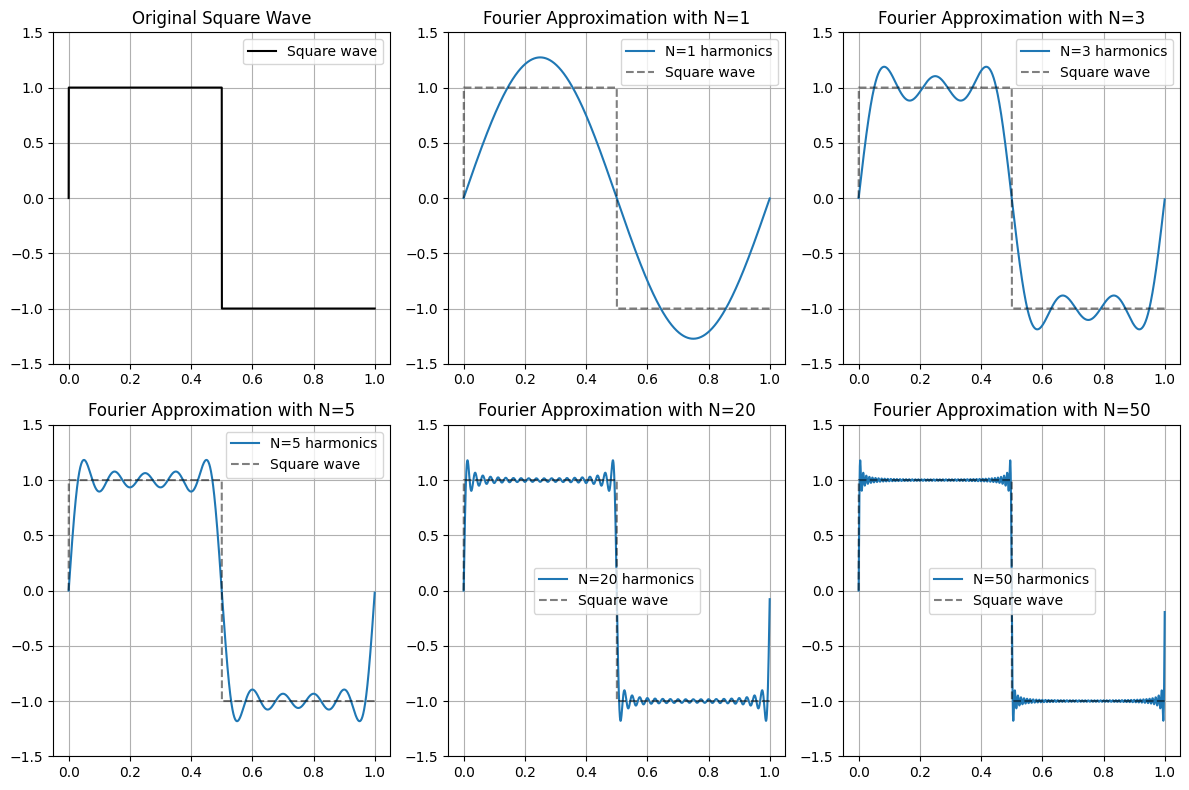

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set parameters for the signal
N = 2048 # Number of sample points
T = 1.0 # Duration of the signal in seconds
f0 = 1 # Fundamental frequency of the square wave in Hz

# List of harmonic numbers used to construct the square wave
#add 20 50
harmonics = [1, 3, 5,20,50]
# Define the square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))


# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        # The Fourier series of a square wave contains only odd harmonics.
        n = 2 * k + 1
        # Add harmonics to reconstruct the square wave.
        result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

1.As N increases, the waveform becomes steeper at the edges and flatter on the plateaus, approaching an ideal square wave.

2.Near the discontinuity (~0.5), clear Gibbs ringing appears: an overshoot/undershoot of about ~9% of the step height that does not vanish with larger 𝑁; it only becomes more localized (narrower).

3.Away from the jump, the approximation error decreases rapidly as 𝑁 grows; at the jump itself, the series converges to the midpoint of the left/right limits (here, 0).

4.In the frequency domain, the square wave contains odd harmonics only (1, 3, 5, …) with amplitudes decaying roughly as 1/n; adding higher harmonics (larger 𝑁) increases bandwidth, sharpening edges but preserving the Gibbs overshoot magnitude.

Increasing 𝑁 makes the signal more square, while the ~9% Gibbs overshoot persists but becomes confined to a narrower region around the discontinuity.

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 4.115759 seconds
NumPy FFT Execution Time: 0.000000 seconds
FFT was too fast to measure a significant duration difference.

Our DFT implementation is close to NumPy's FFT: True


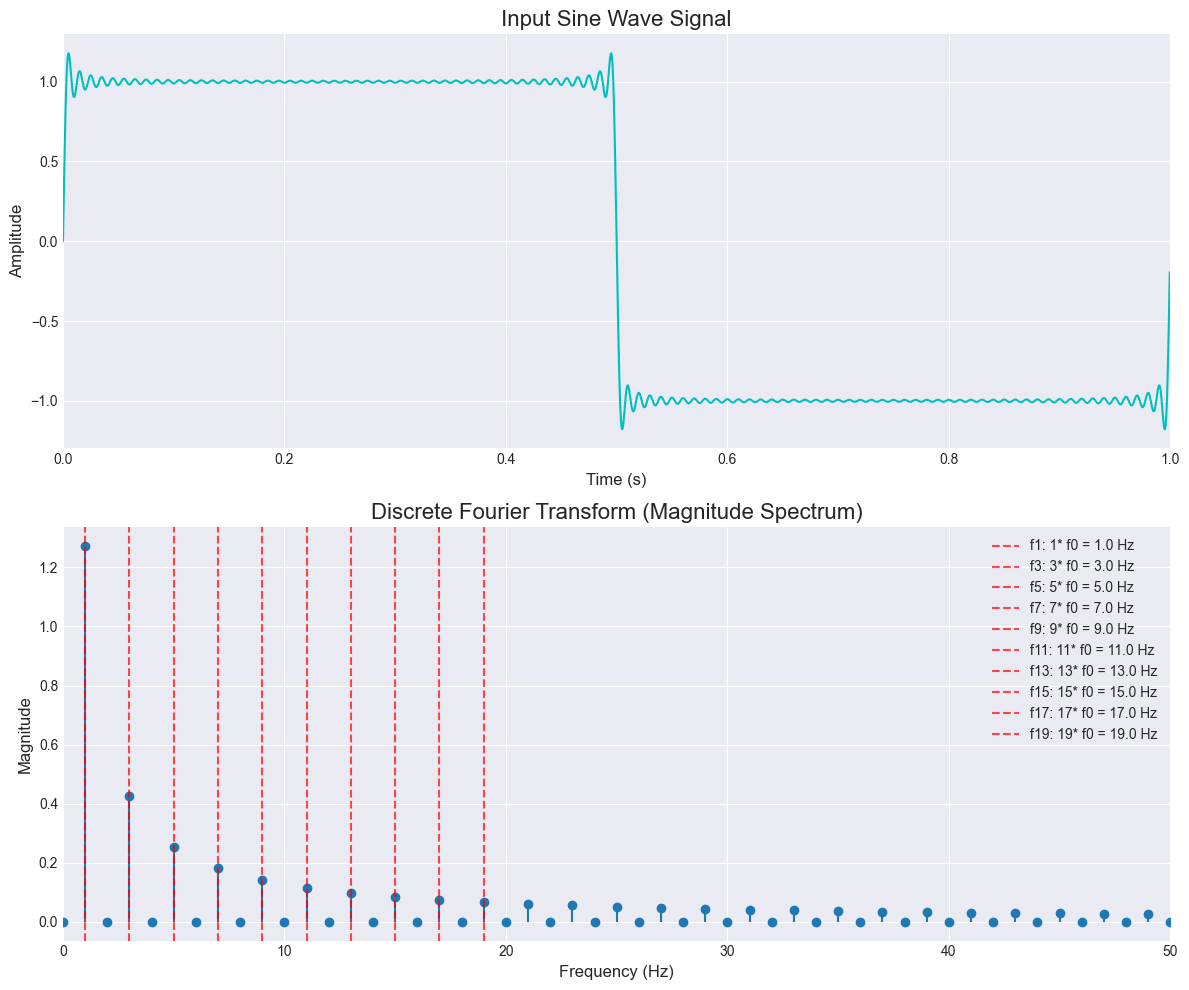

In [2]:
# 2. Apply the DFT and time the execution
def naive_dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).
    Args:
    x (np.ndarray): The input signal, a 1D NumPy array
    Returns:
    np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X

# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)
# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")
# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title(
    'Discrete Fourier Transform (Magnitude Spectrum)',
    fontsize=16
    )
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50) # Focus on lower frequencies
ax2.grid(True)

# Add vertical lines for the first ten frequencies
for i in range(20):
    if i < len(xf) and i % 2 == 1: # Only plot odd harmonics
        ax2.axvline(
            xf[i], color='r', linestyle='--', alpha=0.7,
            label=f'f{i}: {i}* f0 = {xf[i]:.1f} Hz'
            )

# Only show labels for first 3 frequencies to avoid cluttering
ax2.legend()
plt.tight_layout()
plt.show()

In [3]:
def naive_dft(x):
    x = np.asarray(x, dtype=np.complex128)
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j*np.pi*k*n/N)
    return X

signal = square_wave_fourier(t, f0, 50)  # use 50 harmonics for a better approximation
start = time.time(); dft_result = naive_dft(signal); naive_duration = time.time()-start
start = time.time(); fft_result = np.fft.fft(signal); fft_duration = time.time()-start

print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} s")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} s")
if fft_duration > 0:
    print(f"FFT is ≈ {naive_duration/fft_duration:.2f}× faster.")
print("DFT ≈ FFT ?", np.allclose(dft_result, fft_result))


--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 3.759418 s
NumPy FFT Execution Time: 0.000000 s
DFT ≈ FFT ? True


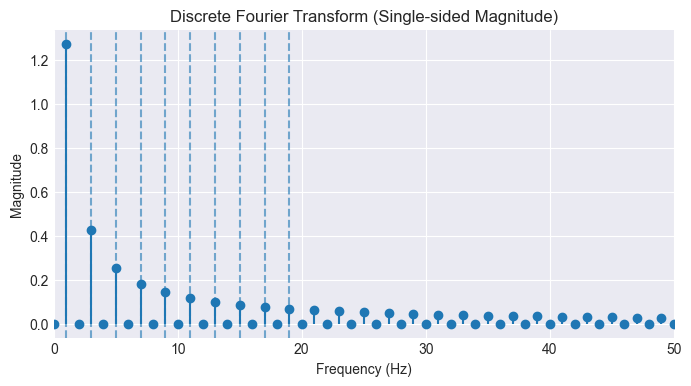

In [4]:
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
magnitude = 2.0/N * np.abs(dft_result[:N//2])

plt.figure(figsize=(8,4))
markerline, stemlines, baseline = plt.stem(xf, magnitude, basefmt=" ")
plt.title("Discrete Fourier Transform (Single-sided Magnitude)")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Magnitude")
plt.xlim(0, 50); plt.grid(True)

# 标注前若干个奇次谐波位置（1,3,5,...）便于对照
for i in range(1, 21, 2):
    plt.axvline(i * f0, linestyle="--", alpha=0.6)
plt.show()


Use pytorch to do the same thing

In [5]:
import torch, math


def square_wave_torch(t, f0):
    t = torch.tensor(t, dtype=torch.float64)
    return torch.sign(torch.sin(2*math.pi*f0*t))


def square_wave_fourier_torch(t, f0, Nh):
    t = torch.tensor(t, dtype=torch.float64)

    #initialize output tensor with zeros
    out = torch.zeros_like(t)

    for k in range(Nh):
        n = 2*k + 1
        out += torch.sin(2*math.pi*n*f0*t) / n
    return (4/math.pi) * out

def naive_dft_torch(x_np):
    x = torch.tensor(x_np, dtype=torch.complex128)
    N = x.shape[0]
    #frequency bins
    k = torch.arange(N, dtype=torch.float64).reshape(-1,1)
    n = torch.arange(N, dtype=torch.float64).reshape(1,-1)
    #DFT matrix
    W = torch.exp(-2j*math.pi*k*n/N)
    X = W @ x
    return X.detach().cpu().numpy()


x_sig = square_wave_fourier_torch(t, f0, 50).numpy()
X_t = naive_dft_torch(x_sig)
print("Torch naive DFT ≈ NumPy FFT ?", np.allclose(X_t, np.fft.fft(x_sig)))


Torch naive DFT ≈ NumPy FFT ? True
